In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from DB.db_manager import DBManager

In [3]:
train_imgs, train_labels, test_imgs, test_labels = DBManager.load_data("C:/Users/antho/Documents/GitHub/data/handsigns/")

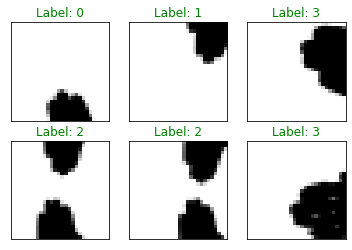

In [4]:
# displaying samples of data
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_imgs[i].reshape([train_imgs.shape[2],
                                      train_imgs.shape[3]]),
               cmap='gray', interpolation='none')
    plt.title("Label: {}".format(train_labels[i]), color='g')  
    plt.xticks([])
    plt.yticks([])

In [5]:
from homemade_framework import framework as NN

In [6]:
# number of epoch
num_epochs = 5
# batch size to compute mini-batch
batch_size = 100
# number of pixels in the image 
input_size = 28*28
# number of possible digit: 0 to 9 
num_class = 7
# small step to find a minima
learning_rate = 0.01
# hidden size
hidden_size = 128
# p dropout
p_dropout = 0
# learning rate decay
LRD = False

## CNN

In [7]:
# Build the model
kernel_size = 3
in_channels = 1
out_channels = 2
data_size = train_imgs.shape[2]
nb_maxpool = 1
out_first_conv = (data_size - kernel_size + 1) // (2*nb_maxpool) - kernel_size + 1

# Build the model
cnn_model = NN.Sequential([NN.Convolution(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size),
                           NN.LeakyReLU(), NN.MaxPooling2D(2),
                           NN.Convolution(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size),
                           NN.LeakyReLU(), NN.Flatten(), NN.BatchNorm(),
                           NN.Linear((out_first_conv**2)*out_channels, hidden_size), NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, num_class), NN.Softmax()], NN.LossMSE())
# Set the learning rate
cnn_model.set_Lr(learning_rate)
# Print model's parameters
cnn_model.print(print_color=True)

Model description: Linear in green, Activation in blue, Loss in magenta, Softmax in red, Flatten in Gray, Convolution in Cyan, BatchNormalization in Black, MaxPooling2D in Yellow, AveragePooling2D in highlight
	Convolution feature maps: 2, kernel size: (2, 1, 3, 3)
	LeakyReLU activation, a=0.01
	Max Pooling layer, size: 2
	Convolution feature maps: 2, kernel size: (2, 2, 3, 3)
	LeakyReLU activation, a=0.01
	Flatten function
	Batch normalization function: a=1, b=0
	Linear layer shape: [242, 128]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [128, 7]
	Softmax function
	MSE


In [8]:
NN.train(cnn_model, num_epochs, train_imgs, train_labels, test_imgs, test_labels, batch_size)

Before training: Epoch: 0, Train Error: 88.4694%,        Test Error: 87.1429%, Loss  0.0000
Epoch: 1, Train Error: 5.6122%,        Test Error: 9.2857%, Loss  50.8701
Epoch: 2, Train Error: 2.1429%,        Test Error: 4.2857%, Loss  8.4040
Epoch: 3, Train Error: 0.9184%,        Test Error: 2.6190%, Loss  2.5709
Epoch: 4, Train Error: 0.6122%,        Test Error: 1.6667%, Loss  1.2786
Epoch: 5, Train Error: 0.5102%,        Test Error: 1.6667%, Loss  0.7325

Training time: 0:01:57.286228
After training: Epoch: 4, Train Error: 0.5102%,        Test Error: 1.6667%, Loss  0.7325


In [9]:
cnn_model.getParametersCount()

32069

In [10]:
cnn_model.save("../handsigns_models/cnn/")

## Confusion matrix

In [12]:
cnn_model.load("../handsigns_models/cnn/")

In [13]:
test_pred = NN.get_inferences(cnn_model, test_imgs)
NN.get_confusion_matrix(test_pred, test_labels, num_class)

array([[66,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  1,  0,  0,  0,  0],
       [ 0,  0, 57,  1,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0],
       [ 0,  4,  0,  0, 65,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  0,  1,  0, 60]])

# FCN

In [14]:
num_epochs = 10

In [15]:
train_imgs_flatten = train_imgs.reshape([train_imgs.shape[0], np.prod(train_imgs.shape[1:])])
test_imgs_flatten = test_imgs.reshape([test_imgs.shape[0], np.prod(test_imgs.shape[1:])])

In [16]:
# Build the model
fcn_model = NN.Sequential([NN.Linear(input_size, hidden_size),
                           NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, hidden_size),
                           NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, num_class),
                           NN.Softmax()], NN.LossMSE())
# Set the learning rate
fcn_model.set_Lr(learning_rate)
# Print model's parameters
fcn_model.print(print_color=True)

Model description: Linear in green, Activation in blue, Loss in magenta, Softmax in red, Flatten in Gray, Convolution in Cyan, BatchNormalization in Black, MaxPooling2D in Yellow, AveragePooling2D in highlight
	Linear layer shape: [784, 128]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [128, 128]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [128, 7]
	Softmax function
	MSE


In [17]:
NN.train(fcn_model, num_epochs, train_imgs_flatten, train_labels,
         test_imgs_flatten, test_labels, batch_size)

Before training: Epoch: 0, Train Error: 92.3469%,        Test Error: 90.7143%, Loss  0.0000
Epoch: 1, Train Error: 0.4082%,        Test Error: 0.4762%, Loss  33.1755
Epoch: 2, Train Error: 0.0000%,        Test Error: 0.2381%, Loss  0.8515
Epoch: 3, Train Error: 0.2041%,        Test Error: 1.1905%, Loss  0.6595
Epoch: 4, Train Error: 0.0000%,        Test Error: 0.2381%, Loss  0.2221
Epoch: 5, Train Error: 0.0000%,        Test Error: 0.2381%, Loss  0.0842
Epoch: 6, Train Error: 0.0000%,        Test Error: 0.2381%, Loss  0.0602
Epoch: 7, Train Error: 0.0000%,        Test Error: 0.2381%, Loss  0.0507
Epoch: 8, Train Error: 0.0000%,        Test Error: 0.2381%, Loss  0.0445
Epoch: 9, Train Error: 0.0000%,        Test Error: 0.2381%, Loss  0.0398
Epoch: 10, Train Error: 0.0000%,        Test Error: 0.2381%, Loss  0.0362

Training time: 0:00:00.386964
After training: Epoch: 9, Train Error: 0.0000%,        Test Error: 0.2381%, Loss  0.0362


In [18]:
fcn_model.getParametersCount()

117899

In [19]:
fcn_model.save("../handsigns_models/fcn/")

In [20]:
fcn_model.load("../handsigns_models/fcn/")

In [21]:
test_pred = NN.get_inferences(fcn_model, test_imgs_flatten)

In [22]:
test_imgs_flatten.shape

(420, 784)

In [23]:
NN.get_confusion_matrix(test_pred, test_labels, num_class)

array([[66,  0,  0,  1,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0, 66,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  0,  0,  0, 60]])

## Test of a simple fully-connected net in Keras

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()
model.add(tf.keras.Input(shape=(784,)))
model.add(Dense(hidden_size, activation='relu'))
model.add(Dense(hidden_size, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 903       
Total params: 117,895
Trainable params: 117,895
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [28]:
train_image_tensor = tf.expand_dims(tf.convert_to_tensor(train_imgs_flatten), axis=1)
train_labels_tensor = tf.expand_dims(tf.one_hot(tf.convert_to_tensor(train_labels), depth=7), axis=1)
train_labels_tensor.shape, train_image_tensor.shape

(TensorShape([980, 1, 7]), TensorShape([980, 1, 784]))

In [29]:
model.fit(train_image_tensor, train_labels_tensor, epochs=num_epochs, batch_size=32)

Epoch 1/10
31/31 [==============================] - 0s 1ms/step - loss: 1.5455 - accuracy: 0.5959
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 1.0231 - accuracy: 0.9327
Epoch 3/10
31/31 [==============================] - 0s 805us/step - loss: 0.7666 - accuracy: 0.9561
Epoch 4/10
31/31 [==============================] - 0s 798us/step - loss: 0.5920 - accuracy: 0.9755
Epoch 5/10
31/31 [==============================] - 0s 864us/step - loss: 0.4855 - accuracy: 0.9816
Epoch 6/10
31/31 [==============================] - 0s 855us/step - loss: 0.4205 - accuracy: 0.9837
Epoch 7/10
31/31 [==============================] - 0s 809us/step - loss: 0.3727 - accuracy: 0.9898
Epoch 8/10
31/31 [==============================] - 0s 831us/step - loss: 0.3389 - accuracy: 0.9898
Epoch 9/10
31/31 [==============================] - 0s 831us/step - loss: 0.3118 - accuracy: 0.9908
Epoch 10/10
31/31 [==============================] - 0s 833us/step - loss: 0.2863 - accuracy: 0.9939


In [30]:
test_labels[10:15]

array([1, 1, 6, 0, 6])

In [31]:
tf.argmax(model(test_imgs_flatten[10:15]), axis=1)

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 1, 6, 0, 6], dtype=int64)>

In [32]:
model.save('../handsigns_models/tf_model/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/tf_model/assets
